In [ ]:
!pip install armagarch
!pip install statsmodels

In [ ]:
import armagarch as ag
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import scipy
import shutil
import statsmodels.api as sm  # Corrected import

# ...

# create a model
model = ag.empModel(ff['Mkt-RF'].to_frame(), meanMdl, volMdl, distMdl)

# Fit model
model.fit()

# get the conditional mean
Ey = model.Ey

# get conditional variance
ht = model.ht
cvol = np.sqrt(ht)

# get standardized residuals
stres = model.stres

# make a prediction of mean and variance over the next 3 days
pred = model.predict(nsteps=10)

# pred is a list of two-arrays with the first array being the prediction of mean
# and the second array being the prediction of variance




/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

                                   ARMA-GARCH estimation results                                    
Dep Variable:                            Mkt-RF    R-squared:                                 0.01
Mean Model:                                ARMA    Adj. R-squared:                            0.01
Vol Model:                                GARCH    Log Likelihood:                        -1836.78
Distribution:                          Gaussian    AIC:                                    3683.55
Method:                                      ML    BIC:                                    3709.08
                                                   Num obs:                                   1220
Date:                          Wed, Nov 22 2023    Df Residuals:                              1216
Time:                                  10:43:48    Df Model:                                     4
                                                                                                    
      

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

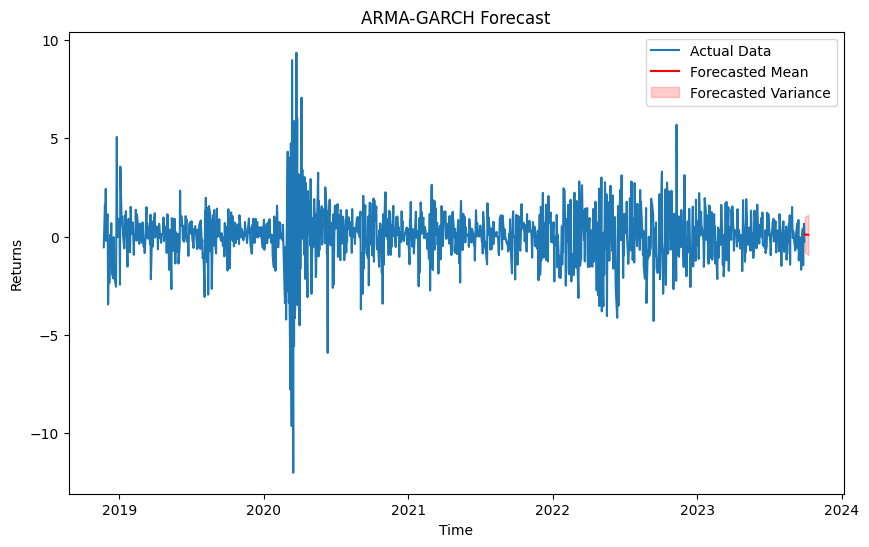

In [ ]:
# Extract mean and variance predictions
mean_pred, var_pred = pred

# Plot the actual data and the forecast
plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(ff['Mkt-RF'], label='Actual Data')

# Plot the forecasted mean, starting from the last actual value
last_observation_index = ff.index[-1]
forecast_index = pd.date_range(start=last_observation_index, periods=len(mean_pred) + 1)[1:]
plt.plot(forecast_index, mean_pred, label='Forecasted Mean', color='red')

# Fill between upper and lower bounds of the forecasted variance
plt.fill_between(forecast_index,
                 mean_pred - np.sqrt(var_pred),
                 mean_pred + np.sqrt(var_pred),
                 color='red', alpha=0.2, label='Forecasted Variance')

plt.title('ARMA-GARCH Forecast')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

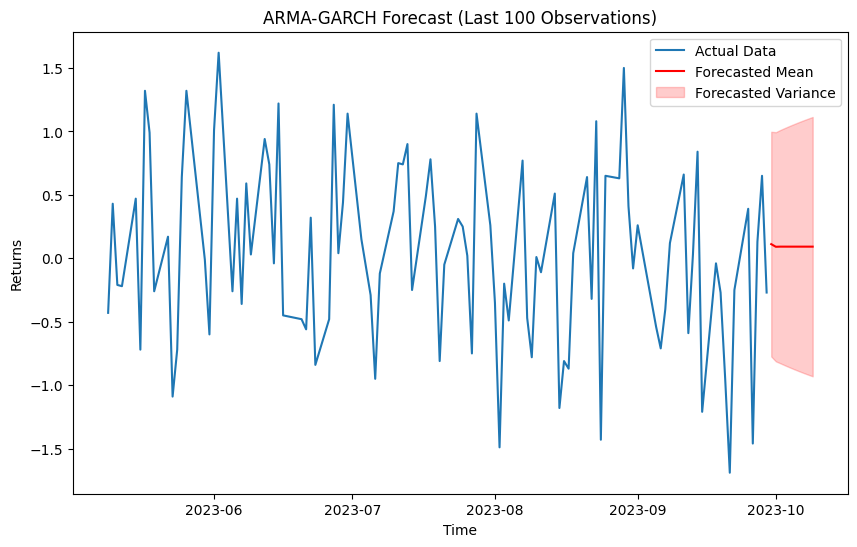

In [ ]:
# ...

# Plot the actual data and the forecast for the last 100 observations
plt.figure(figsize=(10, 6))

# Plot the actual data for the last 100 observations
plt.plot(ff['Mkt-RF'][-100:], label='Actual Data')

# Plot the forecasted mean, starting from the last actual value
forecast_index = pd.date_range(start=last_observation_index, periods=len(mean_pred) + 1)[1:]
plt.plot(forecast_index[-100:], mean_pred[-100:], label='Forecasted Mean', color='red')

# Fill between upper and lower bounds of the forecasted variance
plt.fill_between(forecast_index[-100:],
                 mean_pred[-100:] - np.sqrt(var_pred[-100:]),
                 mean_pred[-100:] + np.sqrt(var_pred[-100:]),
                 color='red', alpha=0.2, label='Forecasted Variance')

plt.title('ARMA-GARCH Forecast (Last 100 Observations)')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()
